# Twitter Sentiment Analysis

### Problem Statement:

The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, we will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So, for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So, for the task of hate speech detection model, we will use the Twitter tweets to identify tweets containing Hate speech.

### Business Understanding:

Detection of hate speech in tweets is an important issue for businesses to consider for several reasons.

First, hate speech can be harmful and offensive to individuals and groups, and businesses have a social responsibility to address it. In addition, businesses may face legal and reputational risks if they fail to address hate speech on their platforms.

Second, businesses that operate social media platforms or engage in social media marketing may need to monitor and address hate speech to maintain the trust and loyalty of their users and customers. If a business is perceived as tolerating hate speech, it may face backlash from users and negative media attention.

Finally, businesses may also have a financial incentive to address hate speech, as it can negatively impact the user experience and drive users away from the platform.

To detect hate speech in tweets, businesses may use a combination of automated tools and human moderation. Automated tools may include machine learning algorithms that are trained to identify hate speech based on certain characteristics, such as the use of certain words or phrases. Human moderation may involve a team of moderators who review tweets and take appropriate action, such as deleting the tweet or banning the user.

It's important to note that detecting hate speech can be challenging, as it may involve complex issues of context and intent. It is also important for businesses to consider the potential for false positives and ensure that their approaches to detecting and addressing hate speech are fair and transparent.

## Import Data Analytics Libraries and Twitter Datasets

In [1]:
# Pandas is necessary for array manipulation and calculation
import pandas as pd
from pandas import DataFrame

# Matplotlib library to create visualizations
import matplotlib.pyplot as plt

# Missingno used for missing data visualization
import missingno as msno

# NumPy necessary for statistical calculations
import numpy as np
np.set_printoptions(threshold=np.inf)

# Change theme of graphs
plt.style.use('fivethirtyeight')

# Export images from Jupyter to PDF
%matplotlib inline

# Import Seaborn to graph distplots and boxplots
import seaborn as sns

from sklearn.linear_model import LinearRegression 

import warnings 
warnings.filterwarnings('ignore')

### Import Datasets

In [2]:
# Import Training and Test dataset
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

train_df = pd.read_csv('train_E6oV3lV.csv')
test_df = pd.read_csv('test_tweets_anuFYb8.csv')

train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data Cleaning and Normalisation

### View Headers

In [3]:
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### Verify Data types

In [5]:
test_df.dtypes

id        int64
tweet    object
dtype: object

In [6]:
train_df.dtypes

id        int64
label     int64
tweet    object
dtype: object

### Check for null values

In [7]:
test_df.isnull().sum()

id       0
tweet    0
dtype: int64

In [8]:
train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Show Shape

In [9]:
test_df.shape

(17197, 2)

In [10]:
train_df.shape

(31962, 3)

### Remove Duplicates

In [11]:
test_df = test_df.drop_duplicates()

In [12]:
train_df = train_df.drop_duplicates()

### Check for Missing Data

<AxesSubplot:>

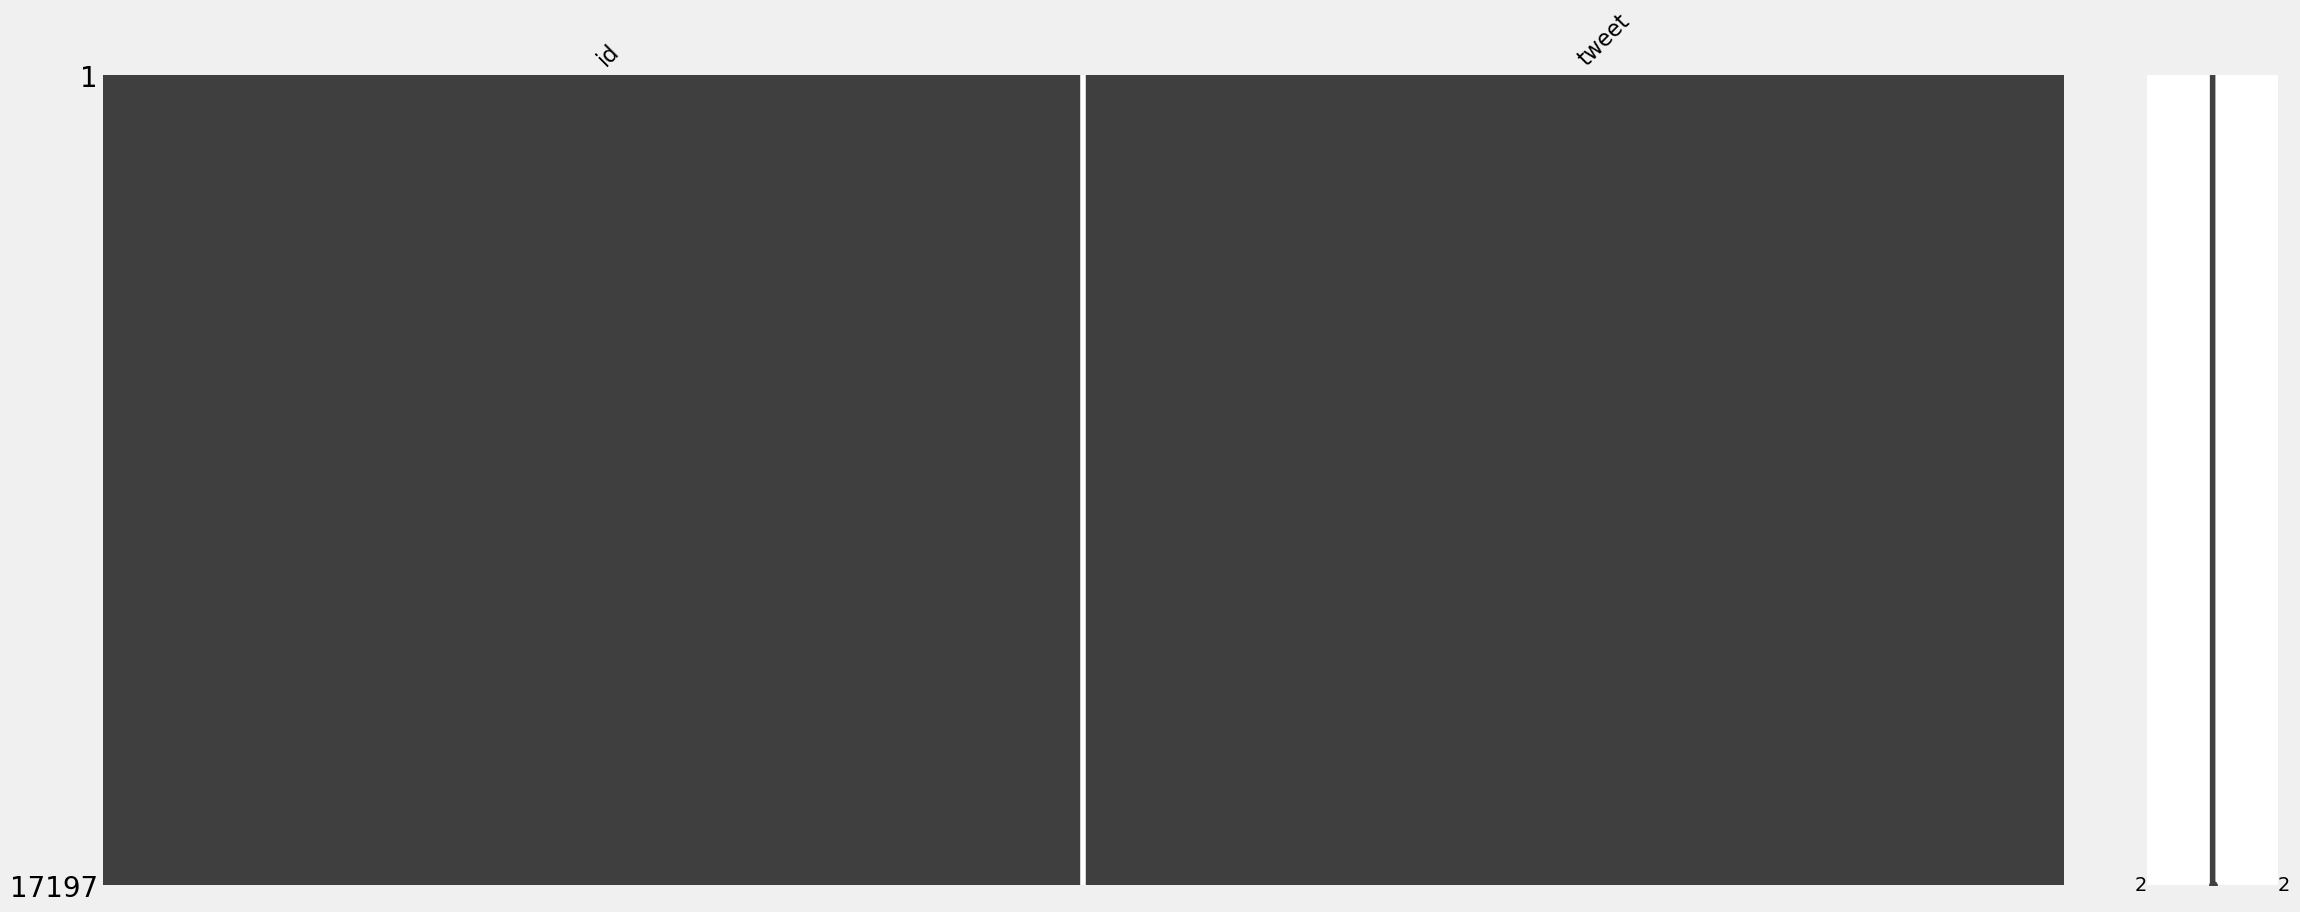

In [13]:
msno.matrix(test_df)

<AxesSubplot:>

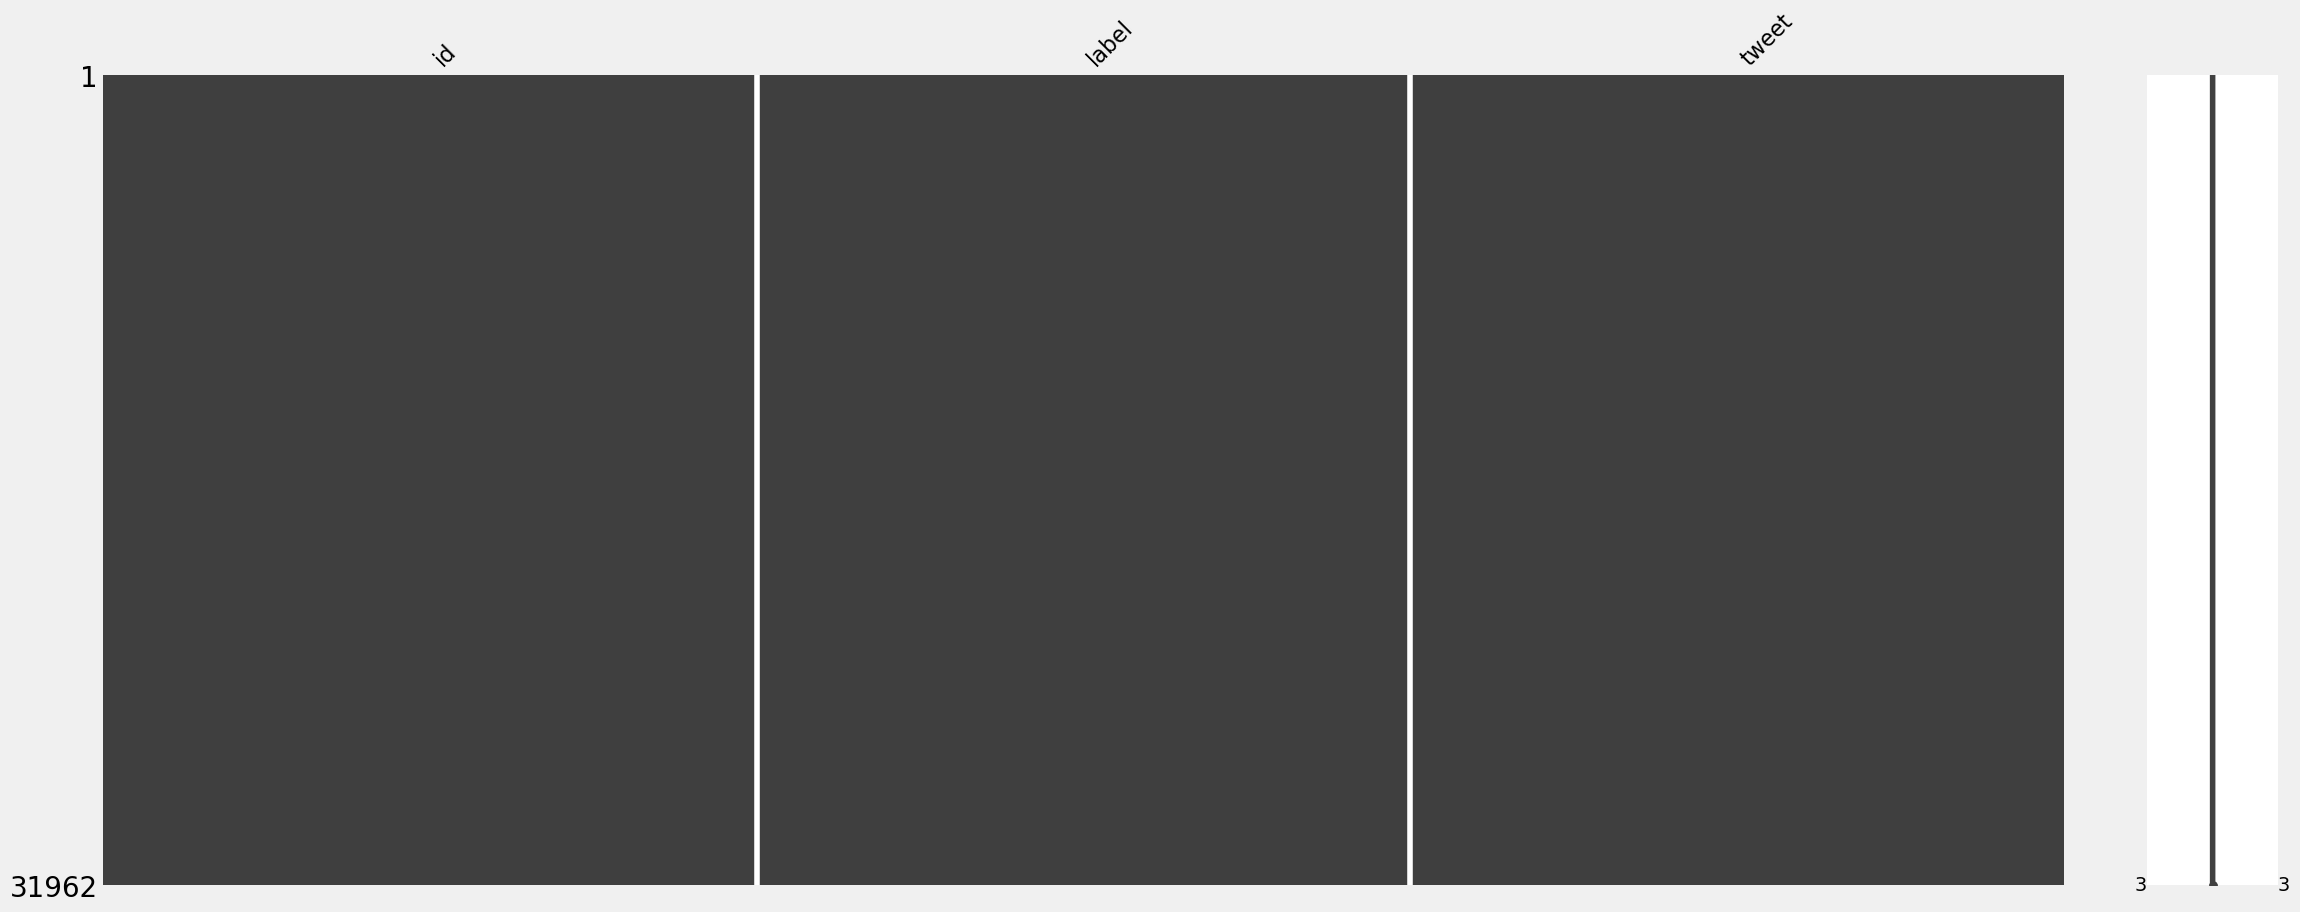

In [14]:
msno.matrix(train_df)

<AxesSubplot:>

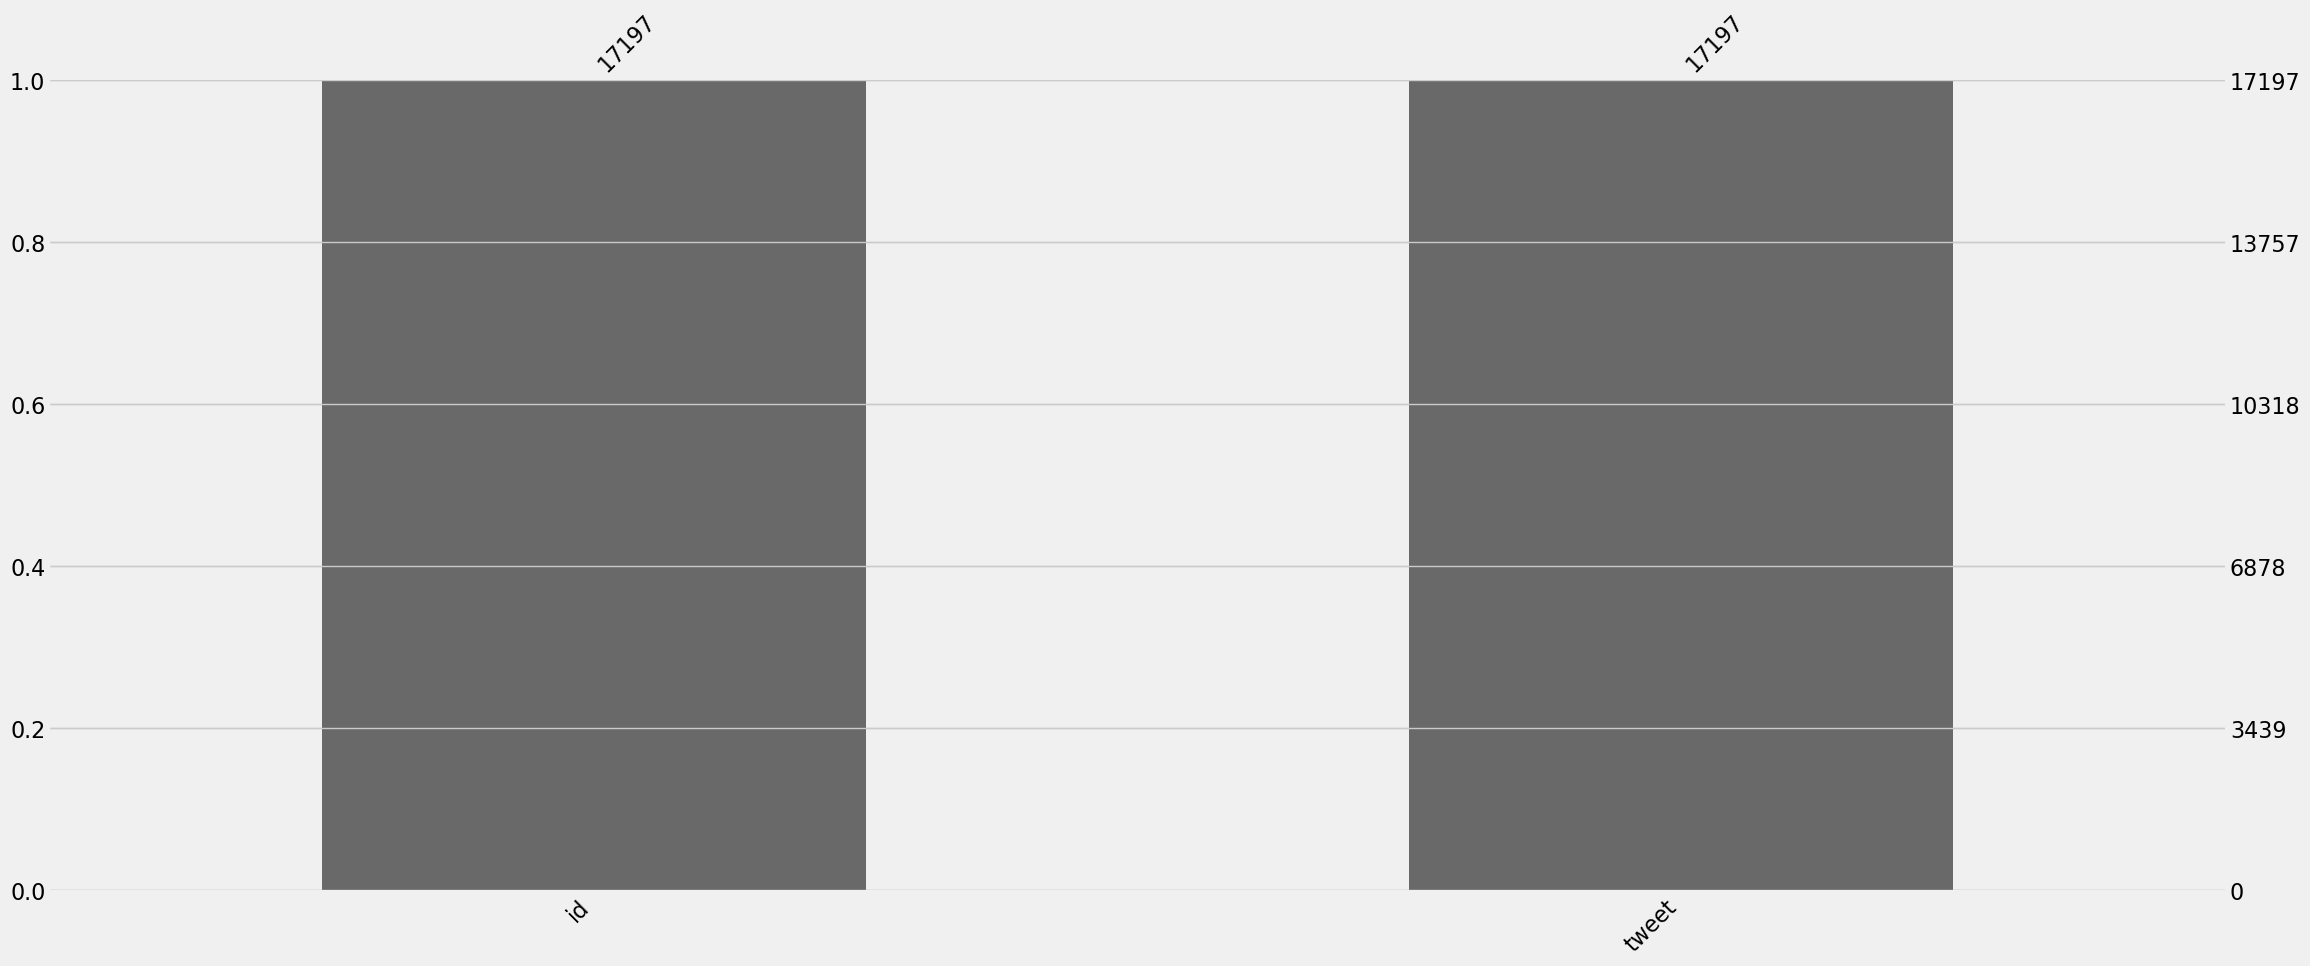

In [15]:
msno.bar(test_df)

<AxesSubplot:>

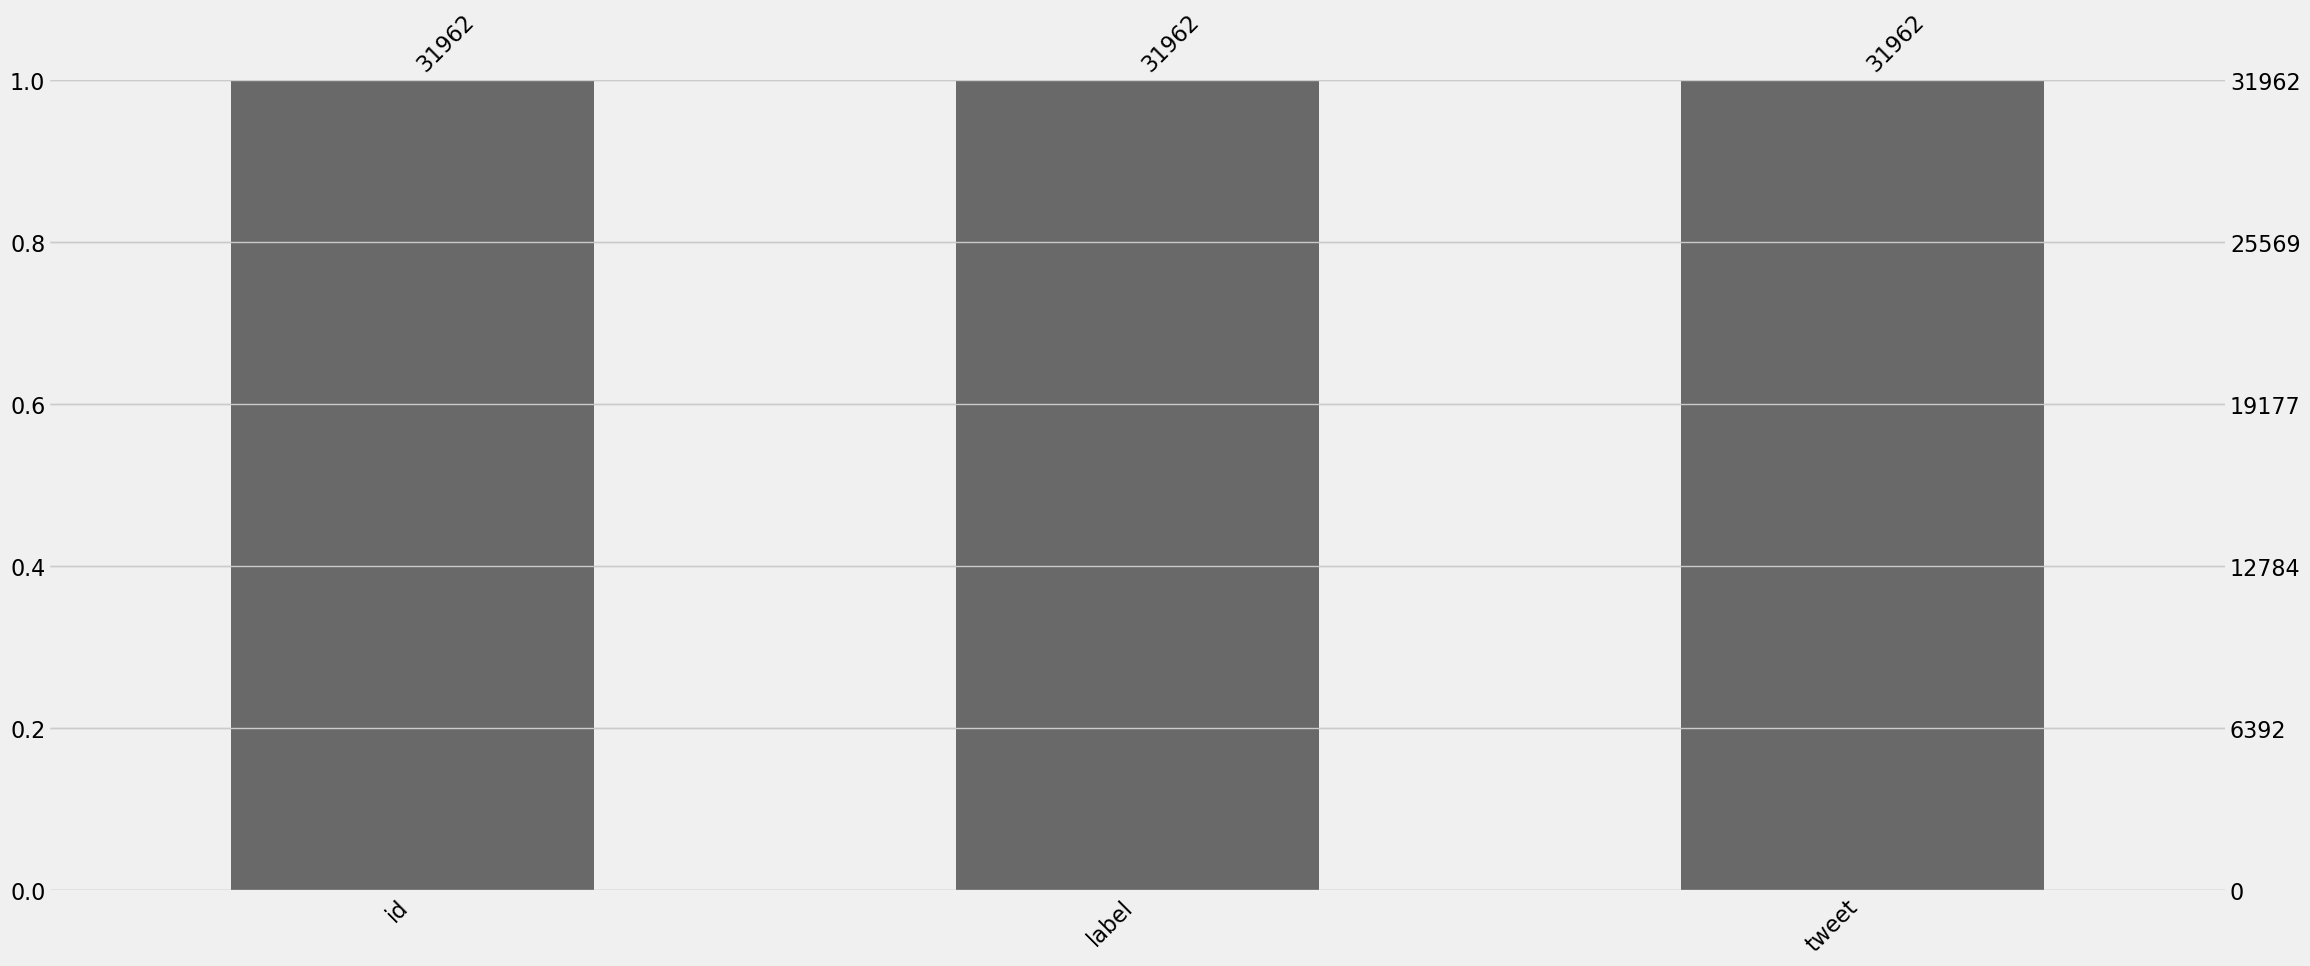

In [16]:
msno.bar(train_df)

### Remove Punctuation

In [17]:
# Import string library and define variable containing string characters
import string
punch = string.punctuation

In [18]:
# Function to remove punctuation from specified text
def remove_punctuation(text):
    no_punct=[words for words in text if words not in punch]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [19]:
test_df['tweet'] = test_df['tweet'].apply(lambda x: remove_punctuation(x))
test_df.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,user white supremacists want everyone to see ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


In [20]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_punctuation(x))
train_df.head()

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


### Tokenization

In [21]:
import re

In [22]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

In [23]:
test_df['tweet']=test_df['tweet'].apply(lambda x: tokenize(x.lower()))
test_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacists, want, everyone, ..."
2,31965,"[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,"[is, the, hp, and, the, cursed, child, book, u..."
4,31967,"[, 3rd, bihday, to, my, amazing, hilarious, ne..."


In [24]:
train_df['tweet']=train_df['tweet'].apply(lambda x: tokenize(x.lower()))
train_df.head()

,id,label,tweet
0,1,0,"[, user, when, a, father, is, dysfunctional, a..."
1,2,0,"[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,"[, bihday, your, majesty]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[, factsguide, society, now, motivation]"


### Stop Words

In [25]:
import nltk

nltk.download('omw-1.4')

# Download stop words (run once)
nltk.download('stopwords')

# Download lemmatizer list (run once)
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [27]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

In [28]:
test_df['tweet'] = test_df['tweet'].apply(lambda x: remove_stopwords(x))
test_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacists, want, everyone, ..."
2,31965,"[safe, ways, heal, acne, altwaystoheal, health..."
3,31966,"[hp, cursed, child, book, reservations, alread..."
4,31967,"[, 3rd, bihday, amazing, hilarious, nephew, el..."


In [29]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: remove_stopwords(x))
train_df.head()

,id,label,tweet
0,1,0,"[, user, father, dysfunctional, selfish, drags..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[, bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, urð, ð, ð, ð, ..."
4,5,0,"[, factsguide, society, motivation]"


### Lemmatization

In [30]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [31]:
def lemmatize(s):
     s = [lemmatizer.lemmatize(word) for word in s]
     return s

In [32]:
test_df = test_df.assign(tweet = test_df['tweet'].apply(lambda x: lemmatize(x)))
test_df.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[, user, white, supremacist, want, everyone, s..."
2,31965,"[safe, way, heal, acne, altwaystoheal, healthy..."
3,31966,"[hp, cursed, child, book, reservation, already..."
4,31967,"[, 3rd, bihday, amazing, hilarious, nephew, el..."


In [33]:
train_df = train_df.assign(tweet = train_df['tweet'].apply(lambda x: lemmatize(x)))
train_df.head()

,id,label,tweet
0,1,0,"[, user, father, dysfunctional, selfish, drag,..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[, bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, urð, ð, ð, ð, ..."
4,5,0,"[, factsguide, society, motivation]"


## Representation Learning

In [34]:
import re
from sklearn.utils import resample

# Clear text of uppercase characters and remove nonstandard text characters
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

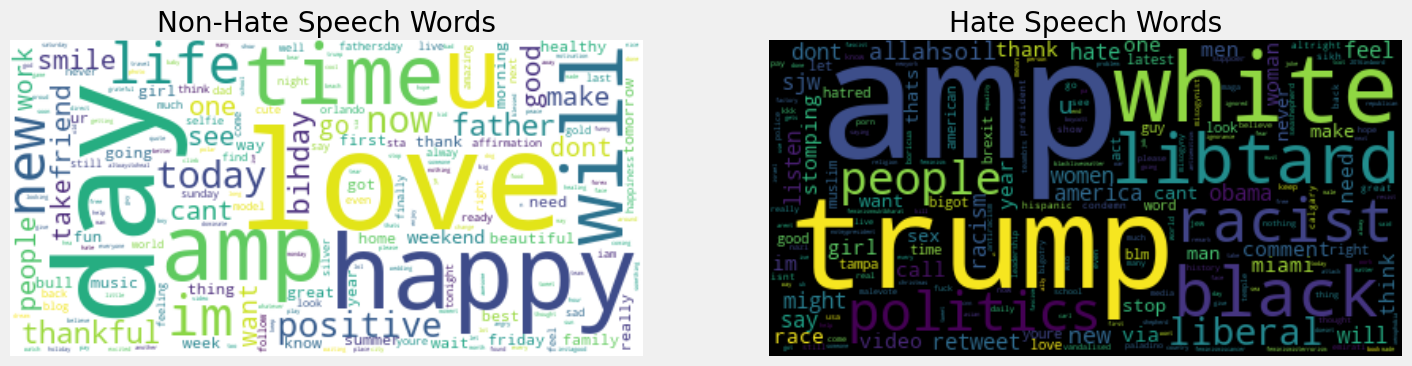

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Speech Words')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Speech Words')

plt.show()

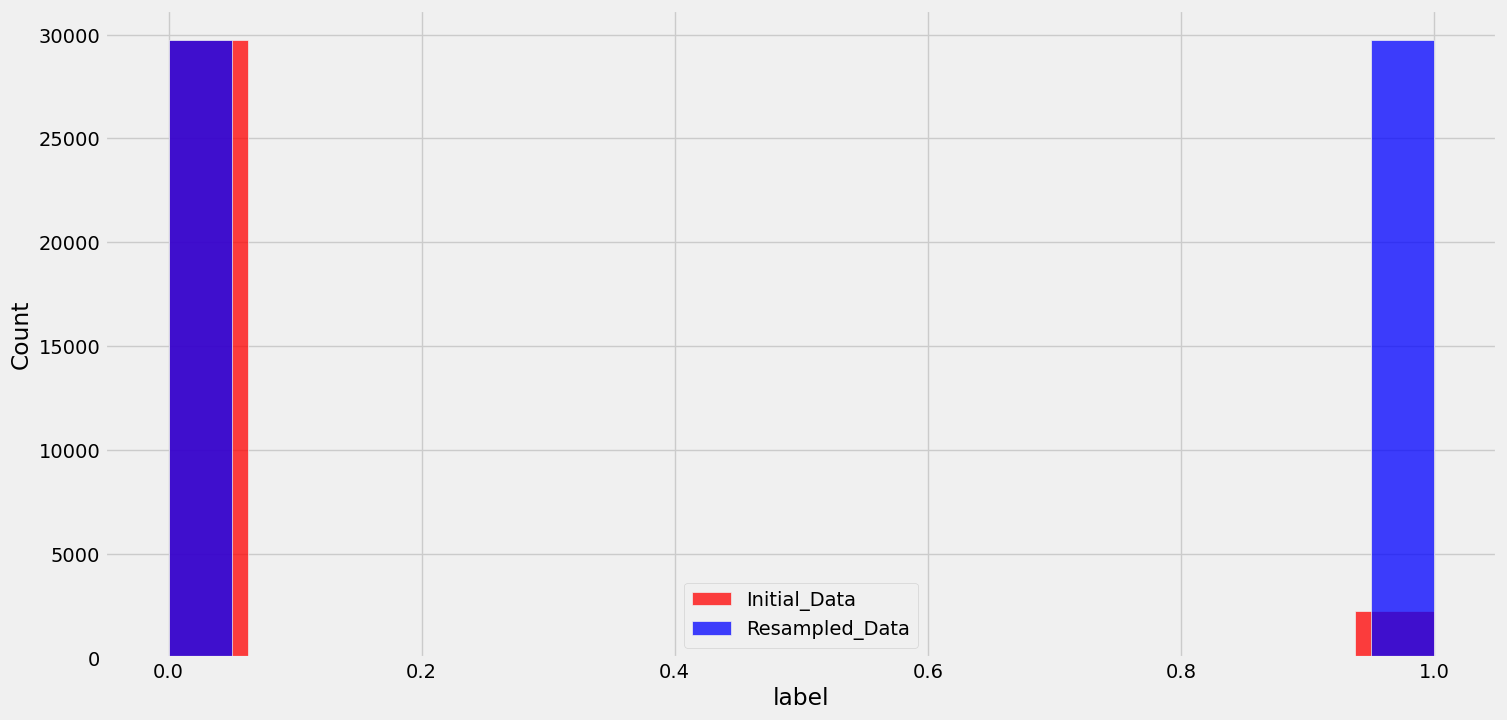

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Initial and Resampled Data
plt.figure(figsize=(16,8))

sns.histplot(data = train['label'], color='red', legend=True)
sns.histplot(data = train_upsampled['label'], color = 'blue', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

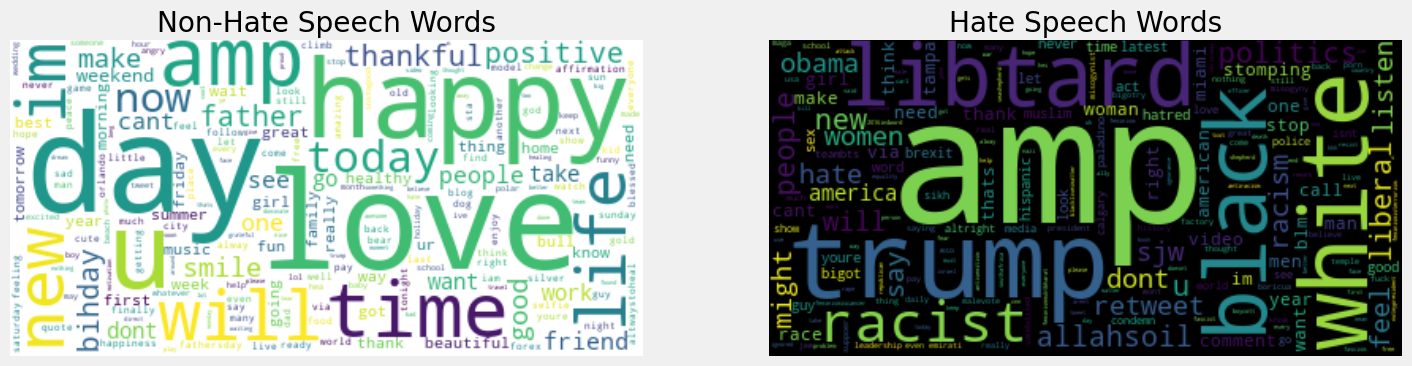

In [37]:
from wordcloud import WordCloud

# Display after Upsampling word clouds

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Speech Words')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Speech Words')

plt.show()

# Model Creation & Training Model (Richard Flores)

In [38]:
import xgboost as xgb
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

# Create XGB Pipeline
pipeline_xgb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', xgb.XGBClassifier(use_label =False)),])

x_train, x_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

# Fit Model
model = pipeline_xgb.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('--'* 20)
print('F1 Score: ',f1_score(y_test, y_predict))
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print('--'*20)
print('---RepeatedKFOLD---')
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state =1)
score2 = cross_val_score(pipeline_xgb, x_train, y_train, cv=cv, scoring='f1_micro', n_jobs=1)
score2 = np.mean(score2)
print('--'* 20)
print('RKFold Score: ', score2)
print('--'* 20)

[11:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "use_label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------------------------------------
F1 Score:  0.9159862338889263
Accuracy Score:  0.9162180349932705
----------------------------------------
---RepeatedKFOLD---
[11:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Pa

--- Axis1 = ref_val, Axis0 = pred_val ---
Confusion Matrix: 
[[6787  662]
 [ 583 6828]]
Precision Score:  0.9111290106054504
Recall Score:  0.9208955223880597
y_hat_shape:  (14860, 2)

random_classifier: ROC AUC=0.500
XGBclassifier: ROC AUC=0.976


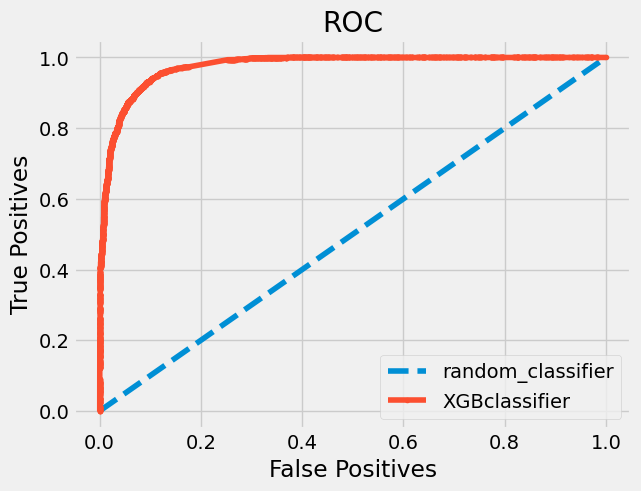

auc-score:  0.9733875328219913
f1-score:  0.9159862338889263


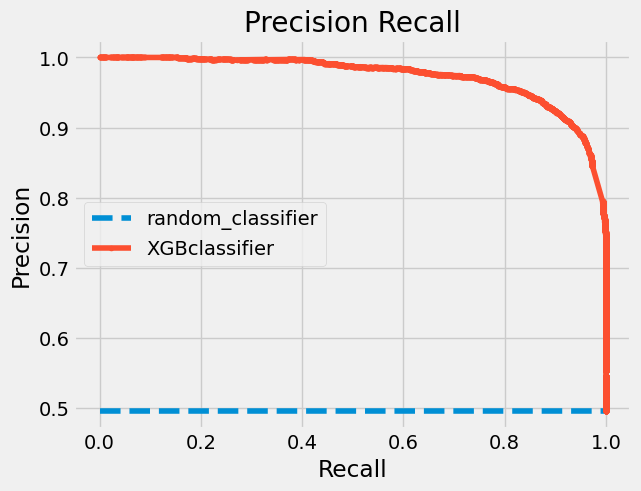

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('--- Axis1 = ref_val, Axis0 = pred_val ---')

x_val, y_val = x_test, y_test

yhat = model.predict_proba(x_val)
ypred = model.predict(x_val)
print('Confusion Matrix: ')
print(confusion_matrix(y_val, ypred, labels = [1,0]).T)
print('Precision Score: ', precision_score(y_val, ypred, labels = [1,0]))
print('Recall Score: ', recall_score(y_val, ypred, labels = [1,0]))

print('y_hat_shape: ',yhat.shape)
yhat = yhat[:,1]

ns_probs = [0 for _ in range(len(y_val))]
ns_auc = roc_auc_score(y_val, ns_probs, labels = [1,0])
lr_auc = roc_auc_score(y_val, yhat, labels = [1,0])
print()
print('random_classifier: ROC AUC=%.3f' % (ns_auc))
print('XGBclassifier: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, yhat)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='random_classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBclassifier')
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.legend()
plt.title('ROC')
plt.show()

lr_precision, lr_recall, _ = precision_recall_curve(y_val, yhat)
print('auc-score: ',auc(lr_recall, lr_precision))
print('f1-score: ', f1_score(y_val, ypred, labels = [1,0]))
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='random_classifier')
plt.plot(lr_recall, lr_precision, marker='.', label='XGBclassifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Recall')
plt.show()

# Model Creation & Training Model (Christos Christoforou)

In [40]:
pip install simpletransformers

  Using cached simpletransformers-0.63.9-py3-none-any.whl (250 kB)
  Using cached transformers-4.26.0-py3-none-any.whl (6.3 MB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached wandb-0.13.9-py2.py3-none-any.whl (2.0 MB)
  Using cached sentencepiece-0.1.97-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached streamlit-1.17.0-py2.py3-none-any.whl (9.3 MB)
  Using cached tokenizers-0.13.2-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached datasets-2.8.0-py3-none-any.whl (452 kB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached setproctitle-1.3.2-cp38-cp38-win_amd64.whl (11 kB)
  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Using cached sentry_sdk-1.14.0-py2.py3-none-any.whl (178 kB)
     ----------------------------------

In [41]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

!pip install simpletransformers
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from transformers import RobertaForSequenceClassification

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

## ignore warnings
import warnings
warnings.filterwarnings("ignore",module = "matplotlib\..*")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Richard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
train_data = pd.read_csv('train_E6oV3lV.csv')
test_data = pd.read_csv('test_tweets_anuFYb8.csv')

In [44]:
## drop the id column
train_data.drop('id', axis=1, inplace=True)

In [45]:
train_data.drop_duplicates(inplace=True)

In [47]:
pip install imblearn

     ------------------------------------ 226.0/226.0 kB 345.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
# Import the RandomUnderSampler class
from imblearn.under_sampling import RandomUnderSampler

# Split the data into features and labels
X = train_data[['tweet']]
y = train_data['label']

# Create a RandomUnderSampler/RandomOverSampler object
undersampler = RandomUnderSampler()

# transform the data
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Create a downsampled/upsampled dataframe
data_downsampled = pd.DataFrame({'tweet': X_undersampled['tweet'], 'label': y_undersampled})

In [49]:
def clean_text(text):
    
    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    

    ## lemmatize + lowercase
    lemmatizer = WordNetLemmatizer()
    for word in text.split():
          token = lemmatizer.lemmatize(word.lower(), pos='v')
             
    
    ## remove stopwords
    keep_words = [token for token in tokens if token not in stopwords.words('english')]
    row_text = ' '.join(keep_words)
    row_text = ' '.join([word for word in row_text.split() if len(word)>1])  ## remove one letter words
    row_text = re.sub(r'\w*\d\w*', '', row_text).strip()


    return row_text

In [50]:
train2 = data_downsampled.copy()
train2.head()

,tweet,label
0,literally geeking so hard over this @user sche...,0
1,"our two presidential candidates, everybody. th...",0
2,@user we're seeing @user tonight!! how amazing...,0
3,sex stories ns porn,0
4,"saw #indians 2outs away, #browns just miss sb,...",0


In [51]:
## apply the clean_text function to the 'tweet' column
train2['tweet'] = train2['tweet'].apply(clean_text)

In [52]:
## remove non-ASCII characters
train2.replace(regex=True, to_replace =['¢','€','£', 'Ã', '¬', 'Ð', '±','½','©','•',
                                    '¾', '§', '¥', '«', '¤', '–', 'œ', '¡', '”', 
                                    '|', 'â', '™', 'Â', 'Î', '¿', 'µ', '´', '‡',
                                    '»', 'Ž', '®', 'º', 'Ï', 'ƒ', '¶', '¹', '┬',
                                    'á', 'Γ', 'Ç', 'Ö', 'ð'], value='', inplace=True)
                                    

In [53]:
## training-testing data
X_train, X_test, y_train, y_test = train_test_split(train2['tweet'], train2['label'], test_size=0.2)

In [54]:
## convert to pandas dataframes
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

#### Feature Extraction using TF-IDF, short for term frequency–inverse document frequency. TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [56]:
# Vectorize the training data using the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 1000)
X_train2 = vectorizer.fit_transform(X_train['tweet']).toarray()
X_test2 = vectorizer.fit_transform(X_test['tweet']).toarray()

In [57]:
# Convert the dense arrays to a tensors
train_input_tensor = torch.tensor(X_train2)
test_input_tensor = torch.tensor(X_test2)

### Simple Transformer Model

In [58]:
class Transformer(nn.Module):
    def __init__(self, input_size, output_size, num_layers, num_heads, hidden_size):
        super(Transformer, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.hidden_size = hidden_size

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size),
            num_layers=num_layers,
        )
        self.output_layer = nn.Linear(input_size, output_size)

    def forward(self, input_tensor):
        
        # Pass the input tensor through the encoder
        encoded_output = self.encoder(input_tensor)
        
        # Pass the encoded output through the output layer
        logits = self.output_layer(encoded_output)

        return logits

In [59]:
# Define the model
model = Transformer(input_size=1000, output_size=2, num_layers=2, num_heads=8, hidden_size=128)

In [60]:
# Convert the labels to a tensor
train_labels = torch.tensor(y_train['label'].values)

# Combine the input tensors into a single dataset
train_dataset = TensorDataset(train_input_tensor, train_labels)

# Create a dataloader from the dataset
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [61]:
# Convert the labels to a tensor
test_labels = torch.tensor(y_test['label'].values)

# Combine the input tensors into a single dataset
test_dataset = TensorDataset(test_input_tensor, test_labels)

# Create a dataloader from the dataset
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [62]:
# Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [63]:
## Training

num_epochs = 5
model.train()
# Define the training loop
for epoch in range(num_epochs):
  for input_tensor, labels in train_dataloader:
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    logits = model(input_tensor.type(torch.float32))
    loss = loss_fn(logits, labels)

    # Backward pass
    loss.backward()
    optimizer.step()

  print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/5, Loss: 0.7618595361709595
Epoch 2/5, Loss: 0.6026470065116882
Epoch 3/5, Loss: 0.7132255434989929
Epoch 4/5, Loss: 0.4668183922767639
Epoch 5/5, Loss: 0.6889235973358154


In [64]:
## training and evaluation dataframes
train_df = pd.DataFrame({'tweet': X_train['tweet'], 'label': y_train['label']})
eval_df = pd.DataFrame({'tweet': X_test['tweet'], 'label': y_test['label']})

In [ ]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args, use_cuda=False)

# Train the model
model.train_model(train_df,overwrite_output_dir=True)

# Model Inference

In [43]:
# Test for Hate Speech using predetermined tweets
def predict(inp):
    inp = pd.Series(inp)
    yhat = ((np.ravel(model.predict(inp)).tolist()))
    if yhat[-1] == 1:
        print('Conc : Hate Speech Detected!')
    if yhat[-1] == 0:
        print('Conc: No Hate Speech Detected')
    

inp = [' Minorities are bad! Fuck off! ', 'Rugby is a fun game! ']
for i in inp:
    print('Entered_Comment: ', i)
    predict(i)
    print('--'*30)

Entered_Comment:   Minorities are bad! Fuck off! 
Conc : Hate Speech Detected!
------------------------------------------------------------
Entered_Comment:  Rugby is a fun game! 
Conc: No Hate Speech Detected
------------------------------------------------------------


# Model Deployment

In [67]:
# import required libraries
import tweepy
import time
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

# api key
api_key = "9D6LvvCirf5d16SudvkS2SiKf"
# api secret key
api_secret_key = "5RIuJlxMfsc3drxlwibWc5qgyf2rZPPb9ZPNcTsBFDKkTEx0gf"
# access token
access_token = "1577475918192201730-nzndXCXcumuxdZfj2DkGZTrXnIxGYT"
# access token secret
access_token_secret = "bzqvlVwjcKF4h13Rwcu35aX5JvxGHVUQQ1Z65TmdNDk2G"

# authorize the API Key
authentication = tweepy.OAuthHandler(api_key, api_secret_key)

# authorization to user's access token and access token secret
authentication.set_access_token(access_token, access_token_secret)

# call the api
api = tweepy.API(authentication, wait_on_rate_limit=True)

In [68]:
def get_related_tweets(text_query):
    # list to store tweets
    tweets_list = []
    # no of tweets
    count = 50
    try:
        # Pulling individual tweets from query
        for tweet in api.search_tweets(q=text_query, count=count):
            print(tweet.text)
            # Adding to list that contains all tweets
            tweets_list.append({'created_at': tweet.created_at,
                                'tweet_id': tweet.id,
                                'tweet_text': tweet.text})
        return pd.DataFrame.from_dict(tweets_list)

    except BaseException as e:
        print('failed on_status,', str(e))
        time.sleep(3)

In [71]:
from get_tweets import get_related_tweets

In [72]:
# importing the required libraries
from flask import Flask, render_template, request, redirect, url_for
from joblib import load


# load the pipeline object
pipeline = load("text_classification.joblib")

# function to get results for a particular text query
def requestResults(name):
    # get the tweets text
    tweets = get_related_tweets(name)
    # get the prediction
    tweets['prediction'] = pipeline.predict(tweets['tweet_text'])
    # get the value counts of different labels predicted
    data = str(tweets.prediction.value_counts()) + '\n\n'
    return data + str(tweets)

In [73]:
# start flask
app = Flask(__name__)

# render default webpage
@app.route('/')
def home():
    return render_template('home.html')

# when the post method detect, then redirect to success function
@app.route('/', methods=['POST', 'GET'])
def get_data():
    if request.method == 'POST':
        user = request.form['search']
        return redirect(url_for('success', name=user))

# get the data for the requested query
@app.route('/success/<name>')
def success(name):
    return "<xmp>" + str(requestResults(name)) + " </xmp> "

In [ ]:
app.run(debug=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Jan/2023 12:28:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Jan/2023 12:28:49] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Jan/2023 12:29:00] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [25/Jan/2023 12:29:02] "GET /success/Trump HTTP/1.1" 200 -


@BlackerbyNeal @ericareport 1. It was absolutely an insurrection. Members of the Oathkeepers have already been conv… https://t.co/H2Iw5iVucN
RT @RonFilipkowski: Ronny’s first tweet about fentanyl ever was on July 3, 2021. He has made 18 tweets since that time blaming the border f…
@The_Trump_Train Hell Yeah!!
@KariLake Are you trying to brake Trump's record of losing?
RT @BlackKnight10k: Now that they've arrested the FBI agent who covered for Trump in 2016 and framed Hillary right before the election, we…
@The_Trump_Train Yes I do.
RT @BlackKnight10k: Now that they've arrested the FBI agent who covered for Trump in 2016 and framed Hillary right before the election, we…
God, I hate #KevinMcCarthy 

Please God, use all your power to smite him so we can rid our country of the stench of… https://t.co/HDu7rARP0k
RT @AntonioSabatoJr: Remember Trump had declassification authority. Biden and Pence didn’t.
@POTUS Funny how Trump did that in 2020.. lol
RT @MarshaBlackburn: The FBI agent who led 

127.0.0.1 - - [25/Jan/2023 12:29:02] "GET /favicon.ico HTTP/1.1" 404 -


## Performance Evaluation & Reporting

 In the Twitter Sentiment Analysis project, our group decided to each test and evaluate a Natural Language Processing model. Richard chose to use XGBoost and SKLearn to model the data and evaluate for hate speech with the results being evaluated by Receiever Operating Characteristic or (ROC) curve is a graphical representation of the performance of a binary classification model.

Chris has chosen to use a simple transformer model using the NLTK, SKLearn, and SimpleTransformer libraries. The evaluation of this model uses the Accuracy metric, which is a simple metric that measures the proportion of predictions that are correct. It is commonly used for classification tasks such as text classification and named entity recognition.

### XGBoost and SKLearn Model Description

XGBoost (eXtreme Gradient Boosting) is an open-source software library that provides an efficient implementation of the gradient boosting algorithm, which is used for supervised learning tasks such as classification and regression.

The gradient boosting algorithm is an ensemble technique that combines multiple weak models, such as decision trees, to form a strong predictive model. XGBoost specifically uses decision tree ensembles and improves upon the traditional gradient boosting algorithm by implementing several performance enhancements such as regularization and parallel computing.

XGBoost is known for its high performance and scalability, and it has been used in many winning solutions in machine learning competitions. It is also widely used in industry for tasks such as customer segmentation, anomaly detection, and click prediction.
It also have various parameter which can be tune to improve the performance.

XGBoost is not typically used in natural language processing (NLP) tasks directly, as it is primarily a gradient boosting algorithm for supervised learning tasks such as classification and regression. However, it can be used as a component in a larger NLP pipeline by training a model using XGBoost and then using the trained model for prediction on NLP tasks.

For example, XGBoost can be used to train a model for text classification tasks such as sentiment analysis and spam detection. The input features for the model can be the bag-of-words representation of the text, and the output label can be the sentiment (positive, negative, neutral) or the class (spam or not spam).

XGBoost can also be used for sequence labeling tasks such as named entity recognition (NER). In this case, the input would be a sequence of words, and the output label would be the entity type (person, location, organization, etc.) for each word in the sequence.

XGBoost's high performance and scalability make it a good choice for NLP tasks that have a large amount of training data, and it is also useful for tasks where interpretability of the model is important.

### XGBoost Evaluation

XGBoost is evaluated by ROC or Reciever Operating Characteristic. In statistics, a Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It is a plot of the true positive rate (TPR) against the false positive rate (FPR) for different threshold settings of the model.

The true positive rate, also known as sensitivity or recall, is the proportion of actual positive cases that are correctly classified by the model. The false positive rate, also known as the fall-out, is the proportion of actual negative cases that are incorrectly classified as positive by the model.

An ROC curve is a useful tool for evaluating a model's performance because it shows the trade-off between the true positive rate and the false positive rate. A model with a high true positive rate and a low false positive rate will have a high overall accuracy and will be located in the top left corner of the ROC curve.

A perfect model will have a ROC curve that is a step function with the false positive rate going from 0 to 1 and the true positive rate going from 1 to 1.
A random model will have a ROC curve that is diagonal line, for this type of model the true positive and false positive rate are the same.

The area under the ROC curve (AUC) is a measure of the overall performance of the model. A model with an AUC of 1.0 is a perfect model, while a model with an AUC of 0.5 is no better than random.

### Simple Transformer Model Description

A transformer model is a type of neural network architecture primarily used for natural language processing tasks such as language translation and text generation. It was introduced in the paper "Attention Is All You Need" by Google researchers in 2017.

A simple transformer model consists of an encoder and a decoder. The encoder takes in a sequence of input tokens (such as words in a sentence) and produces a set of hidden states, which summarize the information in the input sequence. The decoder then takes in these hidden states and generates an output sequence (such as a translation of the input sentence).

Both the encoder and decoder are made up of multiple layers of a type of attention mechanism called self-attention, as well as feed-forward neural network layers. The self-attention mechanism allows the model to weigh the importance of different parts of the input and output sequences, which is useful for tasks such as language translation where certain words or phrases in the source sentence may be more important to the meaning of the target sentence.

### Simple Transformer Model Evaluation

Evaluating a transformer model in natural language processing (NLP) tasks involves using metrics that are specific to the task at hand. A common metrics used to evaluate transformer models in NLP tasks includes "Accuracy". Accuracy is a simple metric that measures the proportion of predictions that are correct. It is commonly used for classification tasks such as text classification and named entity recognition.

It's also important to note that in some NLP tasks, it's important to evaluate the model with human evaluation as well, where a group of human evaluators rate the output of the model.
In addition to these metrics, it is also important to evaluate the model's performance on a variety of test sets to ensure that it generalizes well to unseen data.

# Sentiment Analysis Results

### XGBoost Model

Our XGBoost model has shown itself to be a prime candidate for sentiment analysis in NLP. The results are shown two-fold, our graphical representation demonstrates the ROC results show a step function with false positive rate starting at 0 and going to 1 which represents a perfect model. Furthermore, our ROC curve shows the true positive and false positive rates are the same as demonstrated by the diagonal line in our graph.

We also calculated an AUC-score of 0.9733875328219913 and F1-score of 0.9159862338889263. The closer our AUC score is to 1 the more perfect the model. The F1 score is a measure of a model's precision and recall. It is commonly used for tasks where the class distribution is imbalanced and accuracy may not be a good indicator of model performance.

Overall, we feel the XGBoost model using SKLearn libraries is a great NLP model for sentiment analysis which has demonstrated reliability and precision.  

# Model Deployment - FLASK

Deploying a natural language processing (NLP) model on Flask is a way to make the model accessible via a web API. Flask is a lightweight web framework for Python that allows for easy creation of web applications and APIs.

The following is a high-level overview of the steps we used to deploy an NLP model on Flask:

* Train and save the NLP model: Train the NLP model using the desired dataset and save the model to a file. This can be done using a library such as PyTorch or TensorFlow.

* Create a Flask application: Create a new Flask application and define the routes that the API will handle. These routes will be used to handle incoming requests and return the model's predictions.

* Load the model: Load the trained NLP model into the Flask application. This can be done using the appropriate library's load function, such as torch.load() for PyTorch models.

* Define the prediction endpoint: Define a route that takes in input data, passes it through the loaded model, and returns the model's predictions. This endpoint will handle the request and response for the API.

* Start the server: Start the Flask development server to make the API accessible. This can be done using the app.run() method.

* Test the API: Test the API by making requests to the endpoint and checking the returned predictions.

It's also possible to deploy the model using a production-ready web server such as Gunicorn or uWSGI and use a reverse proxy server like Nginx to handle the request and response on the API.

It's also important to consider security and access control when deploying the model, you should protect the API endpoint with a token-based authentication or API key to prevent unauthorized access.